In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

data = pd.read_csv('DatabreachesMA2007_2022.csv')

# Create a DataFrame from the data
df = pd.DataFrame(data)


/Users/yutasugiyama/opt/anaconda3/lib/python3.9/site-packages/scipy/__init__.py:155: UserWarning: A NumPy version >=1.18.5 and <1.25.0 is required for this version of SciPy (detected version 1.25.2
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"


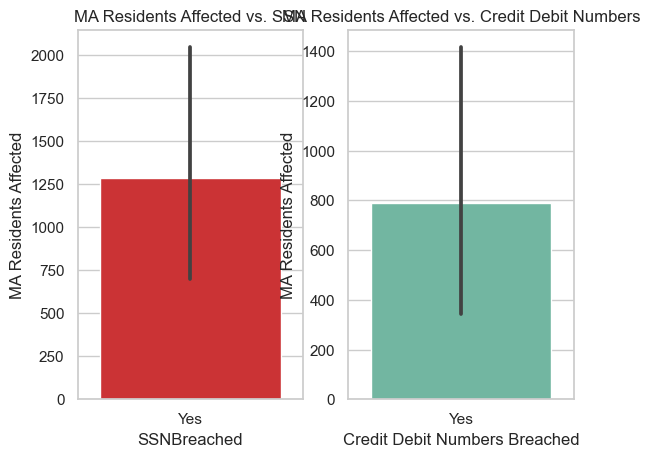

In [15]:
# Plot 1: MA Residents Affected vs. SSN Breached?
plt.subplot(1, 2, 1)
sns.barplot(data=df, x='SSNBreached', y='MA Residents Affected', palette='Set1')
plt.xlabel('SSNBreached')
plt.ylabel('MA Residents Affected')
plt.title('MA Residents Affected vs. SSN')

# Plot 2: MA Residents Affected vs. Credit Debit Numbers Breached?
plt.subplot(1, 2, 2)
sns.barplot(data=df, x='Credit Debit Numbers Breached', y='MA Residents Affected', palette='Set2')
plt.xlabel('Credit Debit Numbers Breached')
plt.ylabel('MA Residents Affected')
plt.title('MA Residents Affected vs. Credit Debit Numbers')

# Adjust layout


# Show the plots
plt.show()

/Users/yutasugiyama/opt/anaconda3/lib/python3.9/site-packages/scipy/__init__.py:155: UserWarning: A NumPy version >=1.18.5 and <1.25.0 is required for this version of SciPy (detected version 1.25.2
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"


<Figure size 3000x1000 with 0 Axes>

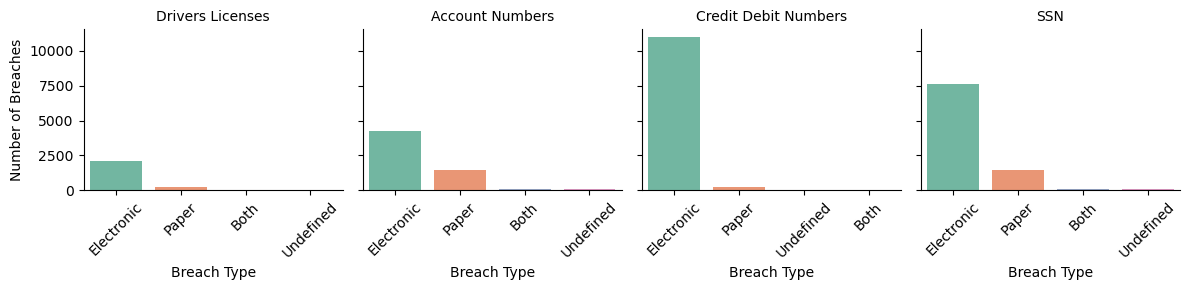

In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Load the data
dataorg = pd.read_csv('DatabreachesMA2007_2022.csv')

# Filter data for each breach type
drivers_compromised = dataorg[dataorg['Drivers Licenses Breached'] == 'Yes']
account_compromised = dataorg[dataorg['Account Number Breached'] == 'Yes']
credit_debit_compromised = dataorg[dataorg['Credit Debit Numbers Breached'] == 'Yes']
ssn_breached = dataorg[dataorg['SSNBreached'] == 'Yes']

# Count the number of breaches by breach type
drivers_counts = drivers_compromised['Breach Type Description'].value_counts()
account_counts = account_compromised['Breach Type Description'].value_counts()
credit_debit_counts = credit_debit_compromised['Breach Type Description'].value_counts()
ssn_breached_counts = ssn_breached['Breach Type Description'].value_counts()

# Combine the counts into a single DataFrame
combined_counts = pd.DataFrame({
    'Breach Type': ['Drivers Licenses'] * len(drivers_counts) +
                   ['Account Numbers'] * len(account_counts) +
                   ['Credit Debit Numbers'] * len(credit_debit_counts) +
                   ['SSN'] * len(ssn_breached_counts),
    'Breach Type Description': list(drivers_counts.index) + list(account_counts.index) + list(credit_debit_counts.index) + list(ssn_breached_counts.index),
    'Number of Breaches': list(drivers_counts) + list(account_counts) + list(credit_debit_counts) + list(ssn_breached_counts)
})

# Set the figure size to make the plots larger
plt.figure(figsize=(30, 10))  # Adjust the figure size accordingly

# Create a facet plot with shorter titles and a single line of facets
g = sns.FacetGrid(combined_counts, col="Breach Type", col_wrap=len(combined_counts['Breach Type'].unique()), sharex=False)
g.map_dataframe(sns.barplot, x="Breach Type Description", y="Number of Breaches", palette="Set2")
g.set_axis_labels("Breach Type", "Number of Breaches")
g.set_titles("{col_name}")
g.set_xticklabels(rotation=45)
plt.tight_layout()
plt.show()
